In [3]:
'''
    #@luisabinader
    Cuales son las palabras mas usadas por el presidente abinader
'''

'\n    #@luisabinader\n    Cuales son las palabras mas usadas por el presidente abinader\n'

In [4]:
# Importando librearias
import tweepy
import pandas as pd
import time
from sentiment_analysis_spanish import sentiment_analysis
import re, string, nltk
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer 
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Llaves de tweeter
consumer_key = 'IR5VbIudsg666A2LsbDnK3qkX'
consumer_secret = '76r1jovbEHLO42FjTbps4w4Z5DJuwqxXMmtHBSMTrBolVCEvoq'
access_token = '1085892254101893121-hRTX8UV4cgXMrtRLylOkAeDPLyV3jY'
access_token_secret = 'yXnB1S5U7qpWxqy1U2JuBpeQ0XcwrlcPy1Piit7OBPUyr'


In [6]:
# Consumiendo el api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [7]:
# Extraccion de los tweetes de la cuenta de usuario 
def username_tweets_to_csv(username, count):
    tweets = []
    try:      
        tweets = tweepy.Cursor(api.user_timeline, id=username).items(count)
        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
        tweets_df = pd.DataFrame(tweets_list,columns=['Datetime', 'Tweet Id', 'Text'])
        tweets_df.to_csv('{}-tweets.csv'.format(username), sep=',', index = False)
    except BaseException as e:
          print('failed on_status,',str(e))
          time.sleep(3)

In [8]:
#Usuario 
username = 'luisabinader'
#Cantidad de Tweet
count = 1000

In [9]:
#Obteniendo los tweet
username_tweets_to_csv(username, count) 
udf=pd.read_csv('{}-tweets.csv'.format(username))  

In [10]:
#DataFrame de muestra
udf

,Datetime,Tweet Id,Text
0,2021-09-26 15:52:21,1442155087783206919,RT @z101digital: [📽] Obispo de La Vega destaca...
1,2021-09-23 18:20:25,1441105185552539658,Me siento muy complacido de haber estado aquí ...
2,2021-09-23 14:10:03,1441042180789858308,"Sin lugar a dudas, cuando se habla de béisbol,..."
3,2021-09-23 13:36:35,1441033756748525569,Me reuní con el Presidente de la Asamblea Gene...
4,2021-09-23 13:12:29,1441027692078395395,Interesante encuentro con el Secretario Genera...
...,...,...,...
995,2020-07-12 16:11:42,1282346907248074754,Muchas gracias a los directivos y a todo el pe...
996,2020-07-12 16:10:33,1282346620416339968,Muchas gracias José Ignacio por tus buenos des...
997,2020-07-12 16:09:58,1282346472755941377,Muchas gracias Raquel. Gracias por acompañarme...
998,2020-07-12 14:55:45,1282327795004211201,Gracias por sus mensajes de felicitaciones de ...


In [11]:
#Creando la instancia del sentiment spanish
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

C:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [12]:
#Apliación del sentiment
udf['sentiment'] = udf['Text'].apply(lambda x:sentiment.sentiment(x))
udf['sentiment']

0      0.833511
1      0.001030
2      0.904270
3      0.079834
4      0.308978
         ...   
995    0.990199
996    0.166268
997    0.087147
998    0.333292
999    0.065653
Name: sentiment, Length: 1000, dtype: float64

In [13]:
# Exploracion
udf['sentiment'].describe()

count    1.000000e+03
mean     1.987118e-01
std      2.718402e-01
min      2.449474e-11
25%      5.613646e-03
50%      5.909172e-02
75%      3.201350e-01
max      9.999978e-01
Name: sentiment, dtype: float64

<AxesSubplot:>

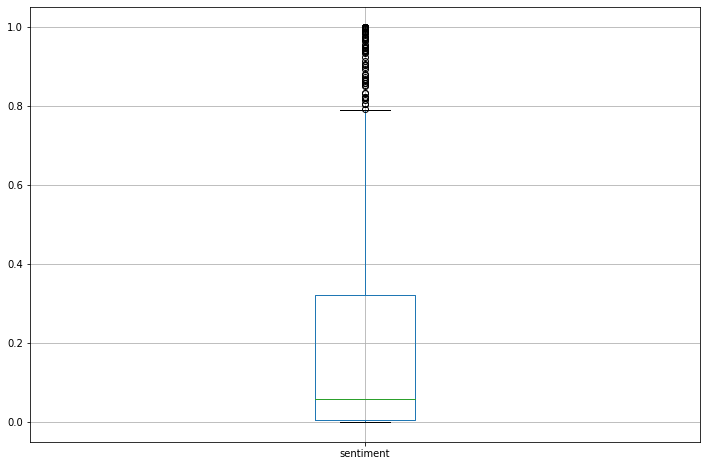

In [14]:
 udf.boxplot(column='sentiment', figsize=(12,8))

In [15]:
#Palabras mas usadas
tokens = udf.Text.to_string().split()
tokens

['0',
 'RT',
 '@z101digital:',
 '[📽]',
 'Obispo',
 'de',
 'La',
 'Vega',
 'destaca...',
 '1',
 'Me',
 'siento',
 'muy',
 'complacido',
 'de',
 'haber',
 'estado',
 'aquí',
 '...',
 '2',
 'Sin',
 'lugar',
 'a',
 'dudas,',
 'cuando',
 'se',
 'habla',
 'de',
 'béisbol,...',
 '3',
 'Me',
 'reuní',
 'con',
 'el',
 'Presidente',
 'de',
 'la',
 'Asamblea',
 'Gene...',
 '4',
 'Interesante',
 'encuentro',
 'con',
 'el',
 'Secretario',
 'Genera...',
 '5',
 'Por',
 'años,',
 'cada',
 'día,',
 'nuestro',
 'país',
 'ha',
 'encarado,',
 '...',
 '6',
 'El',
 'Estado',
 'dominicano',
 'reafirma',
 'su',
 'compromiso',
 'co...',
 '7',
 'A',
 'este',
 'solemne',
 'cónclave,',
 'le',
 'manifiesto',
 'que',
 'la',
 '...',
 '8',
 'Es',
 'imperativo',
 'manifestar,',
 'de',
 'la',
 'manera',
 'más',
 'fir...',
 '9',
 'Es',
 'necesario',
 'que',
 'esta',
 'comunidad',
 'de',
 'naciones,',
 'a...',
 '10',
 'Desde',
 'que',
 'asumimos',
 'el',
 'poder,',
 'hemos',
 'venido',
 'anun...',
 '11',
 'En',
 'lo',
 '

In [16]:
def tokenize(text):
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    return tknzr.tokenize(text)

In [17]:
def remove_stopwords(text):
    tokens = tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [18]:
def normalize_corpus(corpus):
    normalized_corpus = []
    for index, text in enumerate(corpus):
        text = text.lower()
        text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub('\[.*?¿\]\%', ' ', text)
        text = re.sub('[‘’“”…«»]', '', text)
        text = re.sub('\n', ' ', text)
        text = re.sub(r'[^A-Za-z]+', '', text)
        text = remove_stopwords(text)
        normalized_corpus.append(text)
    return normalized_corpus

In [19]:
#Lista de conectores o pablaras que limpiar
stopword_list = nltk.corpus.stopwords.words('spanish')

lista = normalize_corpus(tokens)
lista

['',
 'rt',
 '',
 '',
 'obispo',
 '',
 '',
 'vega',
 'destaca',
 '',
 '',
 'siento',
 '',
 'complacido',
 '',
 'haber',
 '',
 'aqu',
 '',
 '',
 '',
 'lugar',
 '',
 'dudas',
 '',
 '',
 'habla',
 '',
 'bisbol',
 '',
 '',
 'reun',
 '',
 '',
 'presidente',
 '',
 '',
 'asamblea',
 'gene',
 '',
 'interesante',
 'encuentro',
 '',
 '',
 'secretario',
 'genera',
 '',
 '',
 'aos',
 'cada',
 'da',
 '',
 'pas',
 '',
 'encarado',
 '',
 '',
 '',
 '',
 'dominicano',
 'reafirma',
 '',
 'compromiso',
 'co',
 '',
 '',
 '',
 'solemne',
 'cnclave',
 '',
 'manifiesto',
 '',
 '',
 '',
 '',
 '',
 'imperativo',
 'manifestar',
 '',
 '',
 'manera',
 'ms',
 'fir',
 '',
 '',
 'necesario',
 '',
 '',
 'comunidad',
 '',
 'naciones',
 '',
 '',
 '',
 '',
 'asumimos',
 '',
 'poder',
 '',
 'venido',
 'anun',
 '',
 '',
 '',
 '',
 'respecta',
 '',
 '',
 'economa',
 '',
 'complace',
 '',
 '',
 '',
 'propsito',
 'fundamental',
 'defender',
 '',
 'pat',
 '',
 'repblica',
 'dominicana',
 '',
 '',
 'firme',
 'defensora',
 'd',

In [20]:
df = pd.DataFrame([dict(zip(lista,map(lambda x: lista.count(x),lista)))])  
df = df.transpose()
df

,0
,4384
rt,115
obispo,2
vega,1
destaca,1
...,...
acompaarme,1
mensajes,1
lisandro,1
macarrulla,1


In [29]:
text = ' '.join(map(str, lista))

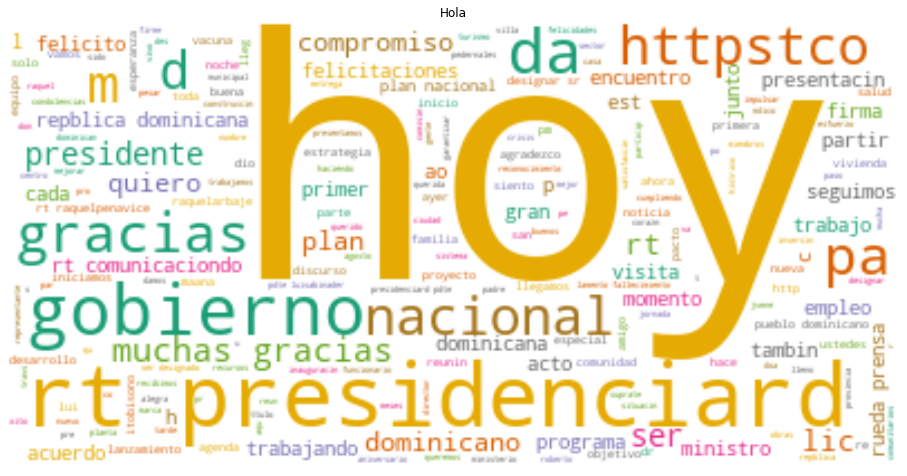

In [30]:
from wordcloud import WordCloud
 
wc = WordCloud(stopwords=stopword_list, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(text)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Hola")
plt.show()           